In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from joblib import parallel_backend
import matplotlib.pyplot as plt

In [23]:
df = pd.read_parquet('../data/cleanedData/allData.parquet')

In [24]:

# # Check for missing values and handle if necessary
# df.dropna(inplace=True)

# features_to_transform = ['nitrateValue', 'phosphateValue', 'ammoniumValue', 'waterFlowPerMinute', 'precipitation']
# df[features_to_transform] = df[features_to_transform].apply(np.log1p)

# # Train-test split
# train_size = int(0.8 * len(df))
# train, test = df[:train_size], df[train_size:]

# # Define features and target variable
# features = ['nitrateValue', 'phosphateValue', 'ammoniumValue', 'waterFlowPerMinute', 'precipitation']
# target = 'oxygenValue'

# X_train, y_train = train[features], train[target]
# X_test, y_test = test[features], test[target]

# # Standardize features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Initialize and train the random forest regressor
# rf_regressor = RandomForestRegressor(n_estimators=300, random_state=42)
# rf_regressor.fit(X_train_scaled, y_train)

# # Make predictions
# predictions = rf_regressor.predict(X_test_scaled)

# # Evaluate the model
# mse = mean_squared_error(y_test, predictions)
# print("Mean Squared Error:", mse)
# print("Mean Absolute Error:", mean_absolute_error(y_test,predictions))
# print("Root Mean Squared Error:", root_mean_squared_error(y_test,predictions))
# print("R2 Score:", r2_score(y_test,predictions))


In [25]:


# # Check for missing values and handle if necessary
# df.dropna(inplace=True)

# features_to_transform = ['nitrateValue', 'phosphateValue', 'ammoniumValue', 'waterFlowPerMinute', 'precipitation']
# df[features_to_transform] = df[features_to_transform].apply(np.log1p)

# # Train-test split
# train_size = int(0.8 * len(df))
# train, test = df[:train_size], df[train_size:]

# # Define features and target variable
# features = ['nitrateValue', 'phosphateValue', 'ammoniumValue', 'waterFlowPerMinute', 'precipitation']
# target = 'oxygenValue'

# X_train, y_train = train[features], train[target]
# X_test, y_test = test[features], test[target]

# # Standardize features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Initialize and train the random forest regressor with parallel jobs
# with parallel_backend('threading', n_jobs=-1):
#     rf_regressor = RandomForestRegressor(n_estimators=300, random_state=42)
#     rf_regressor.fit(X_train_scaled, y_train)

# # Make predictions
# predictions = rf_regressor.predict(X_test_scaled)

# # Evaluate the model
# mse = mean_squared_error(y_test, predictions)
# print("Mean Squared Error:", mse)
# print("Mean Absolute Error:", mean_absolute_error(y_test,predictions))
# print("Root Mean Squared Error:", np.sqrt(mse))
# print("R2 Score:", r2_score(y_test,predictions))


In [26]:


# Check for missing values and handle if necessary
df.dropna(inplace=True)

features_to_transform = ['nitrateValue', 'phosphateValue', 'ammoniumValue', 'waterFlowPerMinute', 'precipitation']
df[features_to_transform] = df[features_to_transform].apply(np.log1p)

# Define features and target variable
features = ['nitrateValue', 'phosphateValue', 'ammoniumValue', 'waterFlowPerMinute', 'precipitation',
            'nitrateValue_lag_1', 'phosphateValue_lag_1', 'ammoniumValue_lag_1', 
    'waterFlowPerMinute_lag_1', 'precipitation_lag_1', 
    'nitrateValue_lag_2', 'phosphateValue_lag_2', 'ammoniumValue_lag_2', 
    'waterFlowPerMinute_lag_2', 'precipitation_lag_2',
    'nitrateValue_lag_3', 'phosphateValue_lag_3', 'ammoniumValue_lag_3', 
    'waterFlowPerMinute_lag_3', 'precipitation_lag_3',     'oxygenValue_lag_1',      'oxygenValue_lag_2',
    'oxygenValue_lag_3'
            ]

target = 'oxygenValue'

features_to_lag = ['nitrateValue', 'phosphateValue', 'ammoniumValue', 'waterFlowPerMinute', 'precipitation']

lags = range(1, 4)  # You can adjust the lag values as needed
for lag in lags:
    for feature in features_to_lag:
        df[f'{feature}_lag_{lag}'] = df[feature].shift(lag)

for lag in lags:
    df[f'{target}_lag_{lag}'] = df[target].shift(lag)

df.dropna(inplace=True)
# Train-test split
train_size = int(0.8 * len(df))
train, test = df[:train_size], df[train_size:]


X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the random forest regressor with parallel jobs
with parallel_backend('threading', n_jobs=-1):
    rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, criterion='squared_error')
    rf_regressor.fit(X_train_scaled, y_train)

# Make predictions
predictions = rf_regressor.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mean_absolute_error(y_test,predictions))
print("Root Mean Squared Error:", np.sqrt(mse))
print("R2 Score:", r2_score(y_test,predictions))


Mean Squared Error: 0.003578659258690491
Mean Absolute Error: 0.03001105791281676
Root Mean Squared Error: 0.059821896147568665
R2 Score: 0.9823335674144262


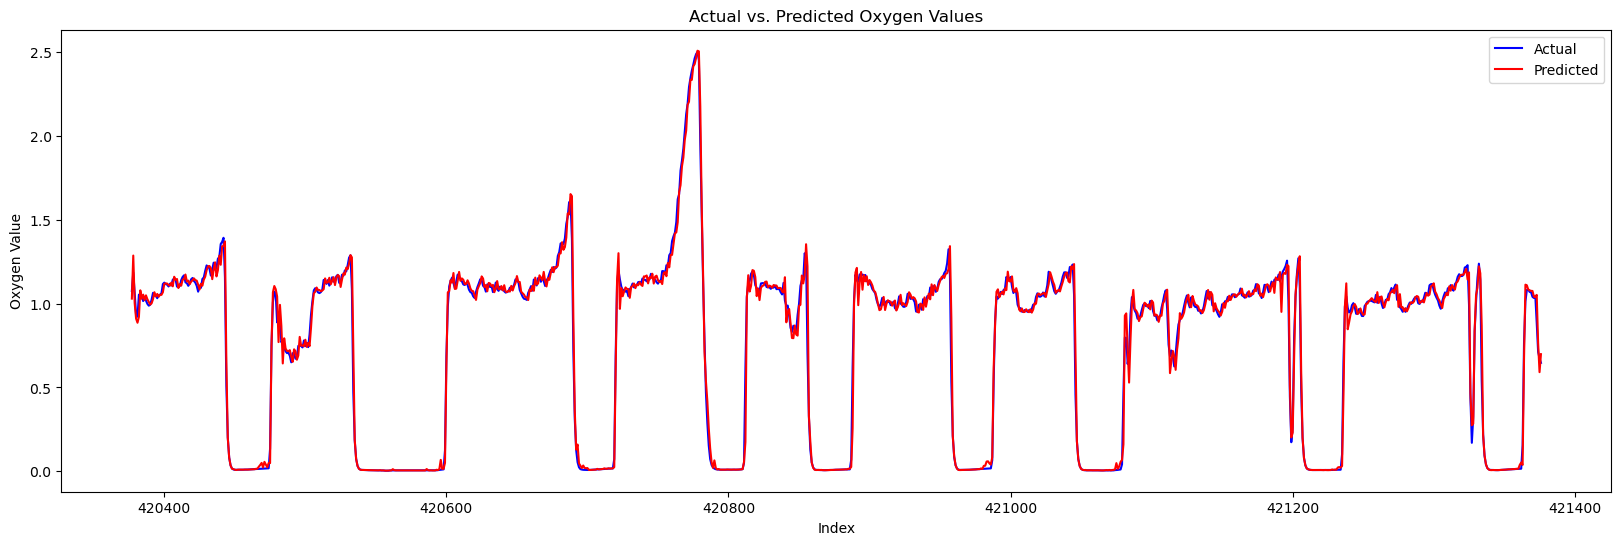

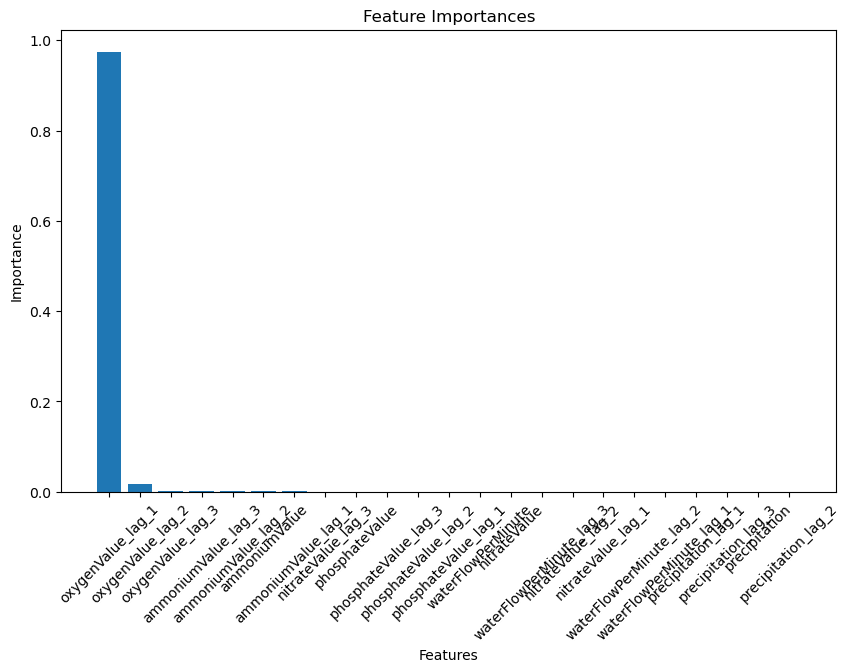

In [27]:

# Plot actual vs. predicted values
plt.figure(figsize=(20, 6))
showData=1000
plt.plot(test.index[:showData], y_test[:showData], label='Actual', color='blue')
plt.plot(test.index[:showData], predictions[:showData], label='Predicted', color='red')
plt.title('Actual vs. Predicted Oxygen Values')
plt.xlabel('Index')
plt.ylabel('Oxygen Value')
plt.legend()
plt.show()

# Plot feature importances
feature_importances = rf_regressor.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = np.array(features)[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(sorted_features, sorted_importances)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

In [46]:
import pandas as pd
import numpy as np
df = pd.read_parquet('../data/cleanedData/allData.parquet')
startData= -30
# Assuming you have the latest available data for the predictors
latest_data = df.iloc[startData]

# Create lagged features for the latest data
latest_data_df = pd.DataFrame([latest_data])
for lag in lags:
    for feature in features_to_lag:
        latest_data_df[f'{feature}_lag_{lag}'] = df.iloc[startData-lag][feature]


for lag in lags:
    latest_data_df[f'{target}_lag_{lag}'] = df.iloc[startData-lag][target]

latest_data_df.drop(columns=["measurementDate","oxygenValue"],inplace=True)
print(latest_data_df.columns)

# Standardize the latest data features
latest_data_scaled = scaler.transform(latest_data_df)

# Predict oxygen values for each minute within the next 30 minutes
prediction_window = 60  # in minutes
predictions = []
minute_features = latest_data_scaled.copy()  # Initial features for the first minute
for minute in range(prediction_window):
    # Make prediction for the minute
    minute_prediction = rf_regressor.predict(minute_features)
    predictions.append(minute_prediction)
    # Update minute_features with the predicted oxygenValue for the next minute
    minute_features = np.roll(minute_features, -1)  # Shift all features one step forward
    minute_features[0][-1] = minute_prediction  # Update the predicted oxygenValue

# Print the predictions for the next 30 minutes
print("Predicted oxygen values for the next 60 minutes:", predictions)


# Generate time index for the next 30 minutes
current_time = df.index[startData]['measurementDate']  
time_index = pd.date_range(start=current_time, periods=prediction_window, freq='T')

# Plot the predicted oxygen values
plt.figure(figsize=(10, 6))
plt.plot(time_index, predictions, marker='o', linestyle='-', color='b')
plt.title('Predicted Oxygen Values for the Next 60 Minutes')
plt.xlabel('Time')
plt.ylabel('Oxygen Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Index(['nitrateValue', 'phosphateValue', 'ammoniumValue', 'waterFlowPerMinute',
       'precipitation', 'nitrateValue_lag_1', 'phosphateValue_lag_1',
       'ammoniumValue_lag_1', 'waterFlowPerMinute_lag_1',
       'precipitation_lag_1', 'nitrateValue_lag_2', 'phosphateValue_lag_2',
       'ammoniumValue_lag_2', 'waterFlowPerMinute_lag_2',
       'precipitation_lag_2', 'nitrateValue_lag_3', 'phosphateValue_lag_3',
       'ammoniumValue_lag_3', 'waterFlowPerMinute_lag_3',
       'precipitation_lag_3', 'oxygenValue_lag_1', 'oxygenValue_lag_2',
       'oxygenValue_lag_3'],
      dtype='object')
Predicted oxygen values for the next 60 minutes: [array([0.10188]), array([0.063435]), array([0.02979]), array([0.67965]), array([0.884805]), array([0.442355]), array([0.97122]), array([1.366145]), array([0.71877]), array([0.812315]), array([1.743215]), array([1.021815]), array([0.83598]), array([1.95023]), array([1.37569]), array([0.741415]), array([2.083395]), array([1.66777]), array([0.66274]), 

/tmp/ipykernel_6245/1586022811.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  minute_features[0][-1] = minute_prediction  # Update the predicted oxygenValue
/tmp/ipykernel_6245/1586022811.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  minute_features[0][-1] = minute_prediction  # Update the predicted oxygenValue
/tmp/ipykernel_6245/1586022811.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  minute_features[0][-1] = minute_prediction  # Update the pr

TypeError: 'int' object is not subscriptable

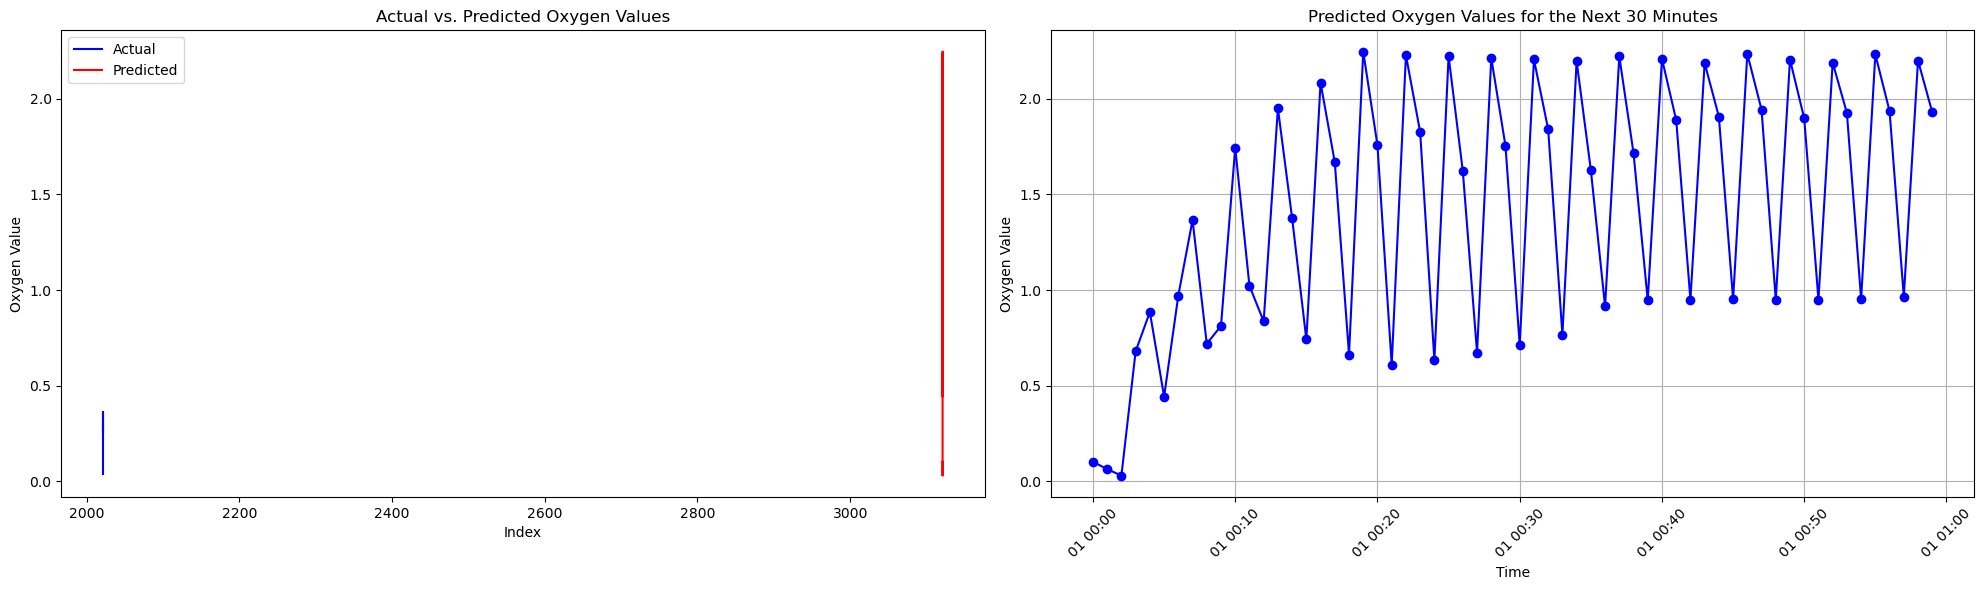

In [45]:
import matplotlib.pyplot as plt
df = pd.read_parquet('../data/cleanedData/allData.parquet')

# Plot actual vs. predicted values
plt.figure(figsize=(20, 6))
showData = 30
plt.subplot(1, 2, 1)
plt.plot(df.iloc[startData:]['measurementDate'], df.iloc[startData:]['oxygenValue'], label='Actual', color='blue')
plt.plot(test.index[:showData], predictions[:showData], label='Predicted', color='red')
plt.title('Actual vs. Predicted Oxygen Values')
plt.xlabel('Index')
plt.ylabel('Oxygen Value')
plt.legend()

# Plot future predicted values
plt.subplot(1, 2, 2)
plt.plot(time_index, predictions, marker='o', linestyle='-', color='b')
plt.title('Predicted Oxygen Values for the Next 30 Minutes')
plt.xlabel('Time')
plt.ylabel('Oxygen Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()
